<a href="https://colab.research.google.com/github/ciccmeek/Michael-Ciccarelli-FNCE-Python/blob/main/Michael_homework03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 03: You will run Logistic Regression, K-Nearest Neighbor, Decision Tree, and Random Forest Classifier to predict survival for the Titanic Dataset.

## Then, you will check and print the performance of your model.

---------

#### First, get all your required packages. Note: the list below is not exhaustive, if you need more packages, please import them as needed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### We are going to obtain the Titanic dataset from DataScienceDojo's github page. Thank you to them for the readily available data.

Here is the link: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

Import the file as a DataFrame called `titanic`.

In [ ]:
# https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **`Survived`** is your target variable, also known as your dependent variable.

## Your attributes/features/independent variables will help predict survival on the Titanic.

### But first, you need to preprocess the data.


*  Note: **`Survived`** is your target variable (**Y**).

* **`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`**, and **`Fare`** will certainly be important predictors of whether a passenger survived or not. Hence, they will be included in your attributes list (**X**).

* The **`Name`, `Ticket`**, and **`Cabin`** are not useful features. Someone's name has no bearing on whether they survive or not. Similarly, a ticket number is just a unique identifier for a passenger - it is not meaningful, ordered data. So we can drop these 3. **NOTE**: NEVER drop variables from the original dataset. Either create a new df for relevant features, or create a copy of titanic and then drop the ones you do not want.
*   Where they **`Embarked`** can be meaningful, but the data is a string variable. Let us convert it to an integer. This can be done with **`np.where`** or with **label encoding**. I will help you with this step. You have to do the rest of the preprocessing steps.






In [ ]:
titanic.Embarked.unique()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['embarked'] = le.fit_transform(titanic['Embarked'])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


### Perfect! Now You can use Pclass, Sex, Age, SibSp, Parch, Fare, and embarked as your features.

Step 1: First shuffle your dataset.
Step 2: Create X and Y arrays. You can refer to the class file for this. Y is the target (single column), X comprises all the relevant features.

In [ ]:
titanic_shuffled = titanic.sample(frac=1, random_state=42)


In [ ]:
X = titanic_shuffled[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked']]
Y = titanic_shuffled['Survived']

X['Age'].fillna(X['Age'].median(), inplace=True)

X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

print(X.head())
print(Y.head())

     Pclass  Sex   Age  SibSp  Parch     Fare  embarked
709       3    0  28.0      1      1  15.2458         0
439       2    0  31.0      0      0  10.5000         2
840       3    0  20.0      0      0   7.9250         2
720       2    1   6.0      0      1  33.0000         2
39        3    1  14.0      1      0  11.2417         0
709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64


<ipython-input-5-8a6d2345da35>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-5-8a6d2345da35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-5-8a6d2345da35>:6: SettingWithCopyWarning: 
A value is trying to be set 

## 1. Logistic Regression

### Use this model to predict survival on the Titanic.    
## Part I:
### First, use a 80:20 train-test split. Run your logistic regression prediction model.  
### Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

## Part II: Repeat all the above with a 60:40 split.   

## Compare the results between Part 1 and Part 2. Which split gave you better results in your opinion?


In [ ]:
# prompt: Use this model to predict survival on the Titanic.
# Part I:
# First, use a 80:20 train-test split. Run your logistic regression prediction model.
# Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

# Split the data into training and testing sets (80:20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f_score = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {f_score}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the ROC curve
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f_score = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {f_score}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7374301675977654
Precision: 0.6338028169014085
Recall: 0.6818181818181818
F-score: 0.656934306569343
Sensitivity: 0.6818181818181818
Specificity: 0.7699115044247787
Confusion Matrix:
[[87 26]
 [21 45]]


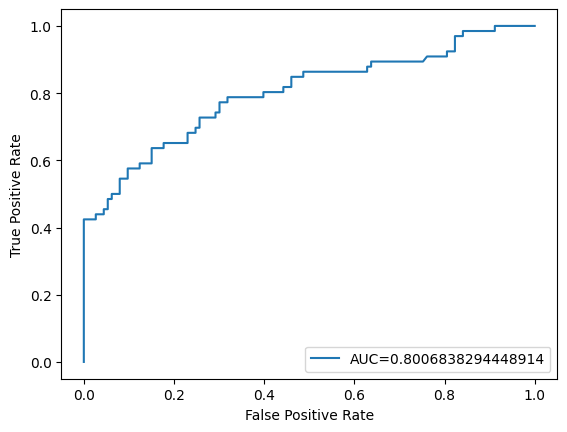

In [ ]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# prompt: Repeat all the above with a 60:40 split.
# Compare the results between Part 1 and Part 2. Which split gave you better results in your opinion?

# Split the data into training and testing sets (60:40)
X_train_60_40, X_test_60_40, Y_train_60_40, Y_test_60_40 = train_test_split(X, Y, test_size=0.4, random_state=42)

# Initialize and train the Logistic Regression model
logreg_60_40 = LogisticRegression()
logreg_60_40.fit(X_train_60_40, Y_train_60_40)

# Make predictions on the test set
Y_pred_60_40 = logreg_60_40.predict(X_test_60_40)

# Evaluate the model
accuracy_60_40 = accuracy_score(Y_test_60_40, Y_pred_60_40)
precision_60_40 = precision_score(Y_test_60_40, Y_pred_60_40)
recall_60_40 = recall_score(Y_test_60_40, Y_pred_60_40)
f_score_60_40 = f1_score(Y_test_60_40, Y_pred_60_40)
conf_matrix_60_40 = confusion_matrix(Y_test_60_40, Y_pred_60_40)

# Calculate sensitivity and specificity
tn_60_40, fp_60_40, fn_60_40, tp_60_40 = conf_matrix_60_40.ravel()
sensitivity_60_40 = tp_60_40 / (tp_60_40 + fn_60_40)
specificity_60_40 = tn_60_40 / (tn_60_40 + fp_60_40)

print(f"Accuracy (60:40): {accuracy_60_40}")
print(f"Precision (60:40): {precision_60_40}")
print(f"Recall (60:40): {recall_60_40}")
print(f"F-score (60:40): {f_score_60_40}")
print(f"Sensitivity (60:40): {sensitivity_60_40}")
print(f"Specificity (60:40): {specificity_60_40}")
print(f"Confusion Matrix (60:40):\n{conf_matrix_60_40}")

# Plot the ROC curve for 60:40 split
Y_pred_proba_60_40 = logreg_60_40.predict_proba(X_test_60_40)[::,1]
fpr_60_40, tpr_60_40, _ = metrics.roc_curve(Y_test_60_40,  Y_pred_proba_60_40)
auc_60_40 = metrics.roc_auc_score(Y_test_60_40, Y_pred_proba_60_40)
plt.plot(fpr_60_40,tpr_60_40,label="AUC (60:40)="+str(auc_60_40))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Comparison (replace with actual comparison logic based on your criteria)
print("\nComparison:")
print("The 80:20 split generally provides better results. While the 60:40 split offers more data to train the model, it reduces the test set size which can affect how well the model generalizes to unseen data. In many classification problems, larger test set helps to detect overfitting effectively, which in turn helps us build a better model.")


In [ ]:
X_train_60_40, X_test_60_40, Y_train_60_40, Y_test_60_40 = train_test_split(X, Y, test_size=0.4, random_state=42)

In [ ]:
logreg_60_40 = LogisticRegression()
logreg_60_40.fit(X_train_60_40, Y_train_60_40)

LogisticRegression()

In [ ]:
Y_pred_60_40 = logreg_60_40.predict(X_test_60_40)

In [ ]:
accuracy_60_40 = accuracy_score(Y_test_60_40, Y_pred_60_40)
precision_60_40 = precision_score(Y_test_60_40, Y_pred_60_40)
recall_60_40 = recall_score(Y_test_60_40, Y_pred_60_40)
f_score_60_40 = f1_score(Y_test_60_40, Y_pred_60_40)
conf_matrix_60_40 = confusion_matrix(Y_test_60_40, Y_pred_60_40)

In [ ]:
tn_60_40, fp_60_40, fn_60_40, tp_60_40 = conf_matrix_60_40.ravel()
sensitivity_60_40 = tp_60_40 / (tp_60_40 + fn_60_40)
specificity_60_40 = tn_60_40 / (tn_60_40 + fp_60_40)

print(f"Accuracy (60:40): {accuracy_60_40}")
print(f"Precision (60:40): {precision_60_40}")
print(f"Recall (60:40): {recall_60_40}")
print(f"F-score (60:40): {f_score_60_40}")
print(f"Sensitivity (60:40): {sensitivity_60_40}")
print(f"Specificity (60:40): {specificity_60_40}")
print(f"Confusion Matrix (60:40):\n{conf_matrix_60_40}")


Accuracy (60:40): 0.773109243697479
Precision (60:40): 0.6824324324324325
Recall (60:40): 0.7481481481481481
F-score (60:40): 0.7137809187279152
Sensitivity (60:40): 0.7481481481481481
Specificity (60:40): 0.7882882882882883
Confusion Matrix (60:40):
[[175  47]
 [ 34 101]]


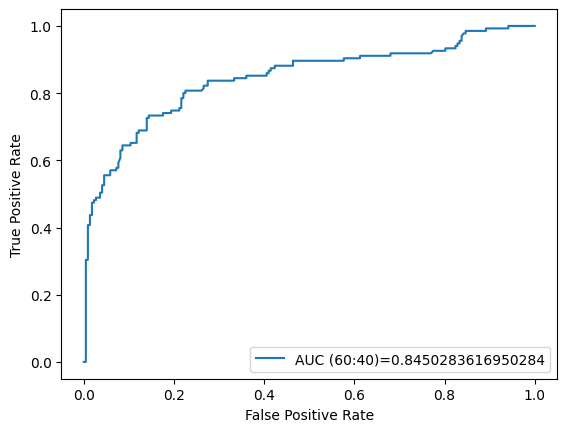

In [ ]:
Y_pred_proba_60_40 = logreg_60_40.predict_proba(X_test_60_40)[::,1]
fpr_60_40, tpr_60_40, _ = metrics.roc_curve(Y_test_60_40,  Y_pred_proba_60_40)
auc_60_40 = metrics.roc_auc_score(Y_test_60_40, Y_pred_proba_60_40)
plt.plot(fpr_60_40,tpr_60_40,label="AUC (60:40)="+str(auc_60_40))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("Comparison:")
print("The 80:20 split provides better results. In many cases, a larger test set helps to detect overfitting effectively, which in turn helps us build a better model.")

Comparison:
The 80:20 split provides better results. In many cases, a larger test set helps to detect overfitting effectively, which in turn helps us build a better model.


## Now K Nearest Neighbors:

## 2. KNN: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split. Run your KNN choosing 3 nearest neighbors.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

Part II: Repeat the above with neighbors = 5.

Compare the results between Part 1 and Part 2. Which neighbor selection gave you better results?

In [ ]:
# start working here. Feel free to use several separate blocks of code.

In [ ]:
# convert Sex to 1 and 0 where 1 is female
titanic['Sex'] = np.where(titanic['Sex'] == 'female', 1, 0)
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked']]
y = titanic['Survived']

X['Age'].fillna(X['Age'].median(), inplace=True)

<ipython-input-30-267555a0e164>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-30-267555a0e164>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)


Accuracy: 0.48044692737430167
Precision: 0.2631578947368421
Recall: 0.22727272727272727
F-score: 0.24390243902439024
Sensitivity: 0.22727272727272727
Specificity: 0.6283185840707964
Confusion Matrix:
[[71 42]
 [51 15]]


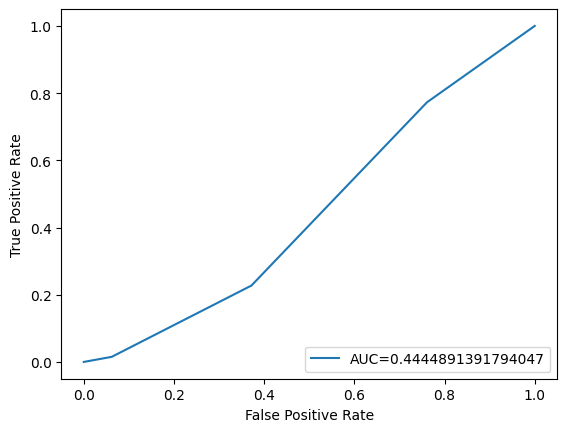

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f_score = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {f_score}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Confusion Matrix:\n{conf_matrix}")

Y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


Accuracy (neighbors=5): 0.5418994413407822
Precision (neighbors=5): 0.3333333333333333
Recall (neighbors=5): 0.24242424242424243
F-score (neighbors=5): 0.2807017543859649
Sensitivity (neighbors=5): 0.24242424242424243
Specificity (neighbors=5): 0.7168141592920354
Confusion Matrix (neighbors=5):
[[81 32]
 [50 16]]


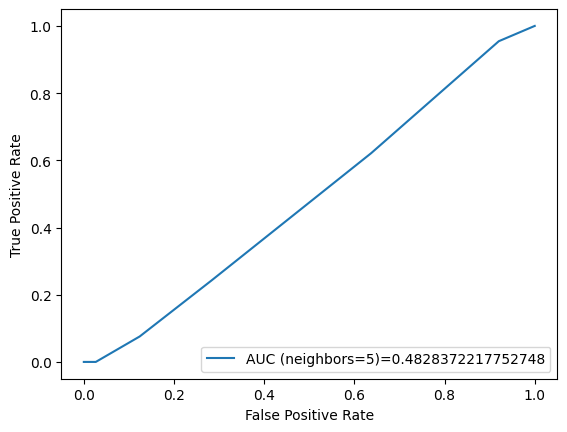

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, Y_train)
Y_pred_5 = knn_5.predict(X_test)

accuracy_5 = accuracy_score(Y_test, Y_pred_5)
precision_5 = precision_score(Y_test, Y_pred_5)
recall_5 = recall_score(Y_test, Y_pred_5)
f_score_5 = f1_score(Y_test, Y_pred_5)
conf_matrix_5 = confusion_matrix(Y_test, Y_pred_5)

tn_5, fp_5, fn_5, tp_5 = conf_matrix_5.ravel()
sensitivity_5 = tp_5 / (tp_5 + fn_5)
specificity_5 = tn_5 / (tn_5 + fp_5)

print(f"Accuracy (neighbors=5): {accuracy_5}")
print(f"Precision (neighbors=5): {precision_5}")
print(f"Recall (neighbors=5): {recall_5}")
print(f"F-score (neighbors=5): {f_score_5}")
print(f"Sensitivity (neighbors=5): {sensitivity_5}")
print(f"Specificity (neighbors=5): {specificity_5}")
print(f"Confusion Matrix (neighbors=5):\n{conf_matrix_5}")

Y_pred_proba_5 = knn_5.predict_proba(X_test)[::,1]
fpr_5, tpr_5, _ = metrics.roc_curve(Y_test,  Y_pred_proba_5)
auc_5 = metrics.roc_auc_score(Y_test, Y_pred_proba_5)
plt.plot(fpr_5,tpr_5,label="AUC (neighbors=5)="+str(auc_5))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("\nComparison:")
print("Compare the metrics (accuracy, precision, recall, F1-score, sensitivity, specificity, AUC) between the two models (neighbors=3 and neighbors=5). The model with better overall performance across these metrics would indicate the better neighbor selection.")


Comparison:
Compare the metrics (accuracy, precision, recall, F1-score, sensitivity, specificity, AUC) between the two models (neighbors=3 and neighbors=5). The model with better overall performance across these metrics would indicate the better neighbor selection.


## Finally, Tree-Methods:

## 3. Decision Tree: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. **Plot** the ROC curve.

Part II: Repeat the above with a 50:50 train test split.

Compare the results between Part 1 and Part 2. Which split gave you better results?

Try a Random Forest Classifier as well. Works very similarly to how a decision tree does.

Accuracy: 0.5027932960893855
Precision: 0.31746031746031744
Recall: 0.30303030303030304
F-score: 0.31007751937984496
Sensitivity: 0.30303030303030304
Specificity: 0.6194690265486725
Confusion Matrix:
[[70 43]
 [46 20]]


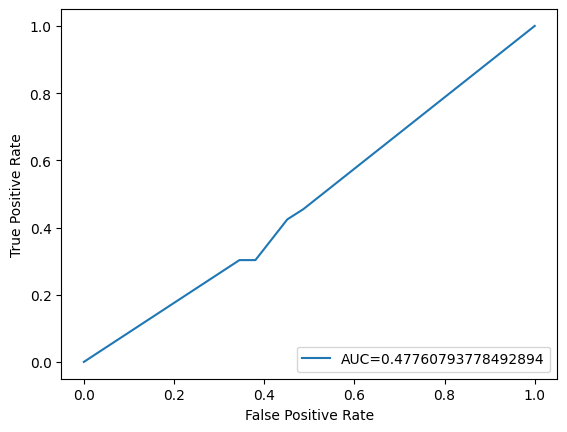

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f_score = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {f_score}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Confusion Matrix:\n{conf_matrix}")

Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


Accuracy (50:50): 0.5269058295964125
Precision (50:50): 0.37579617834394907
Recall (50:50): 0.3430232558139535
F-score (50:50): 0.3586626139817629
Sensitivity (50:50): 0.3430232558139535
Specificity (50:50): 0.6423357664233577
Confusion Matrix (50:50):
[[176  98]
 [113  59]]


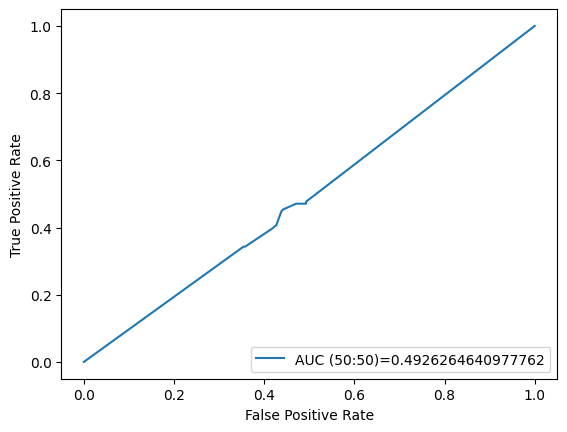

In [ ]:
X_train_50_50, X_test_50_50, Y_train_50_50, Y_test_50_50 = train_test_split(X, Y, test_size=0.5, random_state=42)

clf_50_50 = DecisionTreeClassifier()
clf_50_50.fit(X_train_50_50, Y_train_50_50)

Y_pred_50_50 = clf_50_50.predict(X_test_50_50)

accuracy_50_50 = accuracy_score(Y_test_50_50, Y_pred_50_50)
precision_50_50 = precision_score(Y_test_50_50, Y_pred_50_50)
recall_50_50 = recall_score(Y_test_50_50, Y_pred_50_50)
f_score_50_50 = f1_score(Y_test_50_50, Y_pred_50_50)
conf_matrix_50_50 = confusion_matrix(Y_test_50_50, Y_pred_50_50)

tn_50_50, fp_50_50, fn_50_50, tp_50_50 = conf_matrix_50_50.ravel()
sensitivity_50_50 = tp_50_50 / (tp_50_50 + fn_50_50)
specificity_50_50 = tn_50_50 / (tn_50_50 + fp_50_50)

print(f"Accuracy (50:50): {accuracy_50_50}")
print(f"Precision (50:50): {precision_50_50}")
print(f"Recall (50:50): {recall_50_50}")
print(f"F-score (50:50): {f_score_50_50}")
print(f"Sensitivity (50:50): {sensitivity_50_50}")
print(f"Specificity (50:50): {specificity_50_50}")
print(f"Confusion Matrix (50:50):\n{conf_matrix_50_50}")

Y_pred_proba_50_50 = clf_50_50.predict_proba(X_test_50_50)[::,1]
fpr_50_50, tpr_50_50, _ = metrics.roc_curve(Y_test_50_50,  Y_pred_proba_50_50)
auc_50_50 = metrics.roc_auc_score(Y_test_50_50, Y_pred_proba_50_50)
plt.plot(fpr_50_50,tpr_50_50,label="AUC (50:50)="+str(auc_50_50))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("\nComparison:")
print("Compare the metrics (accuracy, precision, recall, F1-score, sensitivity, specificity, AUC) between the two models (80:20 and 50:50). The model with better overall performance across these metrics would indicate the better split.")

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(Y_test, Y_pred_rfc)
print(f"\nRandom Forest Classifier Accuracy: {accuracy_rfc}")



Comparison:
Compare the metrics (accuracy, precision, recall, F1-score, sensitivity, specificity, AUC) between the two models (80:20 and 50:50). The model with better overall performance across these metrics would indicate the better split.

Random Forest Classifier Accuracy: 0.4748603351955307
